In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from datetime import datetime
import holidays
from scipy.spatial import transform
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import KFold,cross_val_score

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/SabinaVino/NewRepository/SabinaVino-patch-2/testcsv/p01.csv',sep=';')

In [4]:
df.head()

,itml.calday,cal.weekday1,pl.zcomdir,flag_p,flag_pl,podcatge,nns
0,20220101,6,CD05,Promo,Brand,250202,544.56
1,20220101,6,CD04,Promo,Brand,250205,125.67
2,20220101,6,CD06,Promo,Brand,250205,773.38
3,20220101,6,CD04,Promo,Brand,250301,31720.97
4,20220101,6,CD05,Promo,Brand,250301,113181.22


In [ ]:
df['year']=df['itml.calday'].astype('str').str.slice(0,4)

In [ ]:
df['month']=df['itml.calday'].astype('str').str.slice(4,6)

In [ ]:
df['day']=df['itml.calday'].astype('str').str.slice(6,8)

In [ ]:
df[['year','month','day']]=df[['year','month','day']].astype('int')

In [ ]:
def wd(day):
  if day >4:
    return 1
  else:
    return 0
df['weekend']=df.apply(lambda x: wd(x['cal.weekday1']),axis=1)

In [ ]:
def date(year,month,day):
  d=datetime(year,month,day)
  return d
df['date']=df.apply(lambda x: date(x['year'],x['month'],x['day']),axis=1)

In [ ]:
def is_holiday(x):
  ru_holidays=holidays.Russia(years=[2022,2023])
  if ru_holidays.get(x):
    return 1
  else:
    return 0
df['holidays']=df['date'].apply(is_holiday)
df.head()

,itml.calday,cal.weekday1,pl.zcomdir,flag_p,flag_pl,podcatge,nns,year,month,day,weekend,date,holidays
0,20220101,6,CD05,Promo,Brand,250202,544.56,2022,1,1,1,2022-01-01,1
1,20220101,6,CD04,Promo,Brand,250205,125.67,2022,1,1,1,2022-01-01,1
2,20220101,6,CD06,Promo,Brand,250205,773.38,2022,1,1,1,2022-01-01,1
3,20220101,6,CD04,Promo,Brand,250301,31720.97,2022,1,1,1,2022-01-01,1
4,20220101,6,CD05,Promo,Brand,250301,113181.22,2022,1,1,1,2022-01-01,1


In [ ]:
df=df.drop(['itml.calday','cal.weekday1','date','year'],axis=1)

In [ ]:
df=pd.get_dummies(df)

In [ ]:
df=df[['podcatge', 'month', 'day', 'weekend', 'holidays',
       'pl.zcomdir_CD01', 'pl.zcomdir_CD02', 'pl.zcomdir_CD03',
       'pl.zcomdir_CD04', 'pl.zcomdir_CD05', 'pl.zcomdir_CD06', 'flag_p_Promo',
       'flag_p_Regular', 'flag_pl_Brand', 'flag_pl_PrLabel','nns']]

<ipython-input-17-8aca00c8d566>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['nns']);


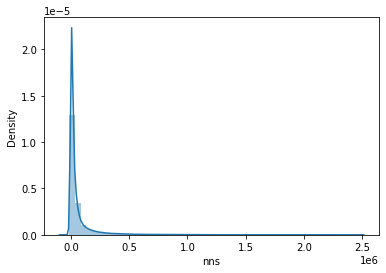

In [ ]:
sb.distplot(df['nns']);



<Axes: xlabel='nns'>

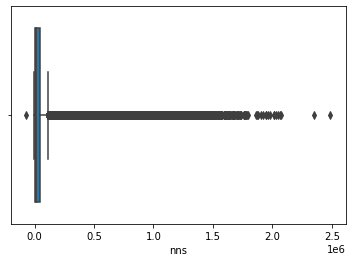

In [ ]:
sb.boxplot(df['nns'],x=df['nns'])

<Axes: >

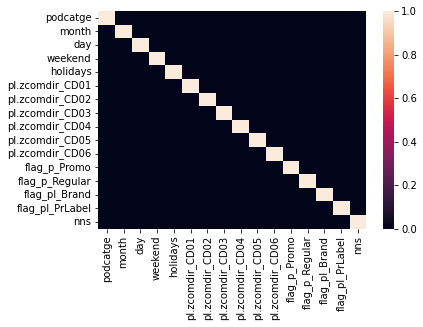

In [ ]:
sb.heatmap(df.corr()>0.7)

In [ ]:
df=df[df['nns']<100000]

In [ ]:
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=22)

In [ ]:
scaler= StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
models = [LinearRegression(),Ridge(),Lasso(),ElasticNet(),KNeighborsRegressor(),DecisionTreeRegressor(),SGDRegressor(),LinearSVR()]
for i in range(len(models)):
  models[i].fit(x_train,y_train)
  print(f'{models[i]} : ')
  y_pred=models[i].predict(x_test)
  print(r2_score(y_test,y_pred))
  print(mse(y_test,y_pred)**0.5)
  print()

LinearRegression() : 
0.0825986398927977
21928.885215302307

Ridge() : 
0.0825986411997951
21928.885199681554

Lasso() : 
0.08259895478483892
21928.881451828478

ElasticNet() : 
0.07753491464218298
21989.321709225886

KNeighborsRegressor() : 
-0.041088874742611026
23360.426480853122

DecisionTreeRegressor() : 
0.7890941570506964
10514.319510251671

SGDRegressor() : 
0.08223659261858995
21933.21184392911

LinearSVR() : 
-0.08767442864614172
23877.360894866248



In [ ]:
kfold=KFold(n_splits = 10, random_state = 7, shuffle = True)
model=DecisionTreeRegressor()
nmse=cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
print(nmse.mean())
print(nmse.std())

-106265239.78456874
2333451.2868872


In [ ]:
nmse=cross_val_score(model, X, Y, cv=kfold, scoring='r2')
print(nmse.mean())
print(nmse.std())

0.7934068645688427
0.004205501213554733
